# Converting image to Hough space and calculating the number of lines

In [7]:
import os 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [9]:
%matplotlib inline

## Load sample image

In [10]:
sample_image_name = 'marker_cut_rgb_512.png'

In [11]:
sample_image = mpimg.imread(sample_image_name)

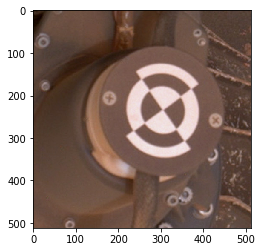

In [13]:
imgplot = plt.imshow(sample_image)

## Hough space math background

A line in Cartesian form could be expressed in the equation:

*y = mx + b*

where: 

m = gradient or slope of the line (rise/run)   
b = y-intercept

![Example of two points with various intersections](hough_mb_parameter_space.png)

If we have two example points, for each point we can set different values of *m* and therefore obtain different intersections, and we can compute corresponding *b* values.

All points on a line in image space intersect at a common point in parameter space. This common point *(m, b)* represents the line in image space.
Unfortunately, the slope, *m*, is undefined when the line is vertical (division by 0!).
To overcome this, we use another parameter space, the hough space.

## Polar coordinate system

A line in Polar coordinate system could be expressed in the equation:

*ρ = x cos θ + y sin θ*

where:

*ρ (rho)* = distance from origin to the line. [-max_dist to max_dist].
          max_dist is the diagonal length of the image.  
*θ* = angle from origin to the line. [-90° to 90°]


## Algorithm steps

1. **Corner or edge detection**. We can use **Canny, Sobel or Adaptive Thresholding algorithm**. The result of this step is binary or grey image with zeros indicating non-edges and ones indicating edges. The result is now interpreted as our input image

2. **Rho range and Theta range creation.** ρ ranges from *-max_dist* to *+max_dist* where *max_dist* is the diagonal length of the input image (the number of diagonal entries in image matrix). θ ranges from *-90∘ to 90∘*. 

3. **Hough accumulator of θ vs ρ**. 